<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del problema:

Entrada: un arreglo de tamaño n cos sus datos en cualquier posicion y un indice k.

Salida:el k-ésimo elemento más pequeño del arreglo

# Descripcion del algoritmo:



1.   Divide los n elementos de la entrada en grupos de hasta 5 elementos cada grupo 
2.   Calcula la mediana de cada grupo con InsertionSor

1.   Calcula la mediana de las medianas de forma recursiva
2.   Utiliza la mediana de las medianas como pivote para particionar los elementos de la entrada, garantizando una particion balanceada
3.   Si la posicion del pivote coincide con el k-esimo elemento se retorna,si es mayor se llama recursivamente para recorrer las posiciones menores del arreglo, en caso de que sea mayor se llama recursivamente para recorrer las posiciones menores 





In [ ]:
def insertionSort(arr):
 
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key
    return arr

In [ ]:
def partition(A, p, r):
    pivot = A[r]
    
    i = p-1
    j = p
    c = 0

    for j in range(j,r):
        c += 1    
        if A[j] <= pivot:
            i += 1
            aux = A[i]
            A[i] = A[j]
            A[j] = aux

    aux = A[i+1]
    A[i+1] = A[r]
    A[r] = aux
    return i+1, c

In [ ]:
def pivot_selection(A, p, r, verbose = False):
    if p == r : 
        if verbose == True:
            print(f"\n    Mediana encontrada! {A[p]}!!\n")
        return A[p]                    

    m = []                                    

    if verbose == True:
        print(f"\n        A = [", end="")

    for i in range(p,r+1, 5):
        if i+4 <= r:
            if verbose == True:
                print(f"{A[i:i+5]}", end="")
            A[i:i+5] = insertionSort(A[i:i+5])  
            m.append(A[i+2])                    
        else:
            if verbose == True:
                print(f"{A[i:r+1]}", end="")
            A[i:r+1] = insertionSort(A[i:r+1])
            a = i + (r-i)//2
            m.append(A[a])
            
    if verbose == True: 
        print("]")
        print(f"        Lista de medianas: {m}")
    return pivot_selection(m, 0, len(m)-1, verbose = verbose)


In [ ]:
def Select(A, p, r, i, verbose = False, c = 0, pasada = 1):
    if verbose == True and c == 0:
        print(f"Arreglo de entrada: {A[p:r+1]}")
        
    

    if p == r:                 
        return A[p], c           
    
    if verbose == True:
        print(f"Pasada numero {pasada}\n")
        print(f"Seleccion del pivote:")

    q = pivot_selection(A, p, r, verbose = verbose)

    for u in range(p, r+1):      
        if A[u] == q: q = u
    aux = A[q]
    A[q] = A[r]
    A[r] = aux            

    q, d = partition(A,p,r)     
    comp = c + d

    if verbose == True:
        print(f"Arreglo post-particion: {A[p:r+1]}\n")
        print(f"Pivote se encuentra en la posicion {q}\n")
        print(f"Comparaciones en esta pasada : {d}")
        print(f"Suma de comparaciones : {comp}\n")
        


    k = q - p + 1

    if i == k:                         # Pivote corresponde al elemento de orden i
      
        return A[q], comp

    elif i < k:                        
        return Select(A, p, q - 1, i, c = comp, verbose = verbose, pasada = pasada + 1)

    else:                               
        return Select(A, q+1, r, i-k, c = comp, verbose = verbose, pasada = pasada + 1)

In [ ]:
arr = [ 10, 4, 5, 8, 6, 11, 26,54,23,98,1 ]
n = len(arr)
k = 8
a,b=Select(arr, 0, n - 1, k)
print("El k-enesimo elemento mas pequeño es",a)
print(f"La cantidad de comparaciones en total es de {b}")

El k-enesimo elemento mas pequeño es 23
La cantidad de comparaciones en total es de 26


# Funcion verbose

In [ ]:
arr = [ 10, 4, 5, 8, 6, 11, 26,54,23,98,1 ]
n = len(arr)
k = 8
a,b=Select(arr, 0, n - 1, k,verbose=True)
print("El k-enesimo elemento mas pequeño es",a)
print(f"La cantidad de comparaciones en total es de {b}")

Arreglo de entrada: [10, 4, 5, 8, 6, 11, 26, 54, 23, 98, 1]
Pasada numero 1

Seleccion del pivote:

        A = [[10, 4, 5, 8, 6][11, 26, 54, 23, 98][1]]
        Lista de medianas: [6, 26, 1]

        A = [[6, 26, 1]]
        Lista de medianas: [6]

    Mediana encontrada! 6!!

Arreglo post-particion: [4, 5, 1, 6, 10, 11, 23, 26, 54, 98, 8]

Pivote se encuentra en la posicion 3

Comparaciones en esta pasada : 10
Suma de comparaciones : 10

Pasada numero 2

Seleccion del pivote:

        A = [[10, 11, 23, 26, 54][98, 8]]
        Lista de medianas: [23, 8]

        A = [[23, 8]]
        Lista de medianas: [8]

    Mediana encontrada! 8!!

Arreglo post-particion: [8, 11, 23, 26, 54, 98, 10]

Pivote se encuentra en la posicion 4

Comparaciones en esta pasada : 6
Suma de comparaciones : 16

Pasada numero 3

Seleccion del pivote:

        A = [[11, 23, 26, 54, 98][10]]
        Lista de medianas: [26, 10]

        A = [[26, 10]]
        Lista de medianas: [10]

    Mediana encontrada! 10!!

A

# Correctitud

por induccion en el tamaño n


Caso n=1:

 Entonces i= 1,p=r, y el i-esimo es A[p] =A[r]

Caso n>1:

Con el pivote q siendo la mediana de la mediana tal que A[j]<A[q]<[k] para todo j y k con p<= j < q < k<=r

Para k=q-p+1; tenemos:


*   El k-ésimo elemento de A[p....r] es A[q]
*   si i < k, el i-esimo de A[p.....r]es el i-esimo de A[p....q-1]


*   si i > k, el i-esimo de A[p....r]es el(i-k)-esimo de A[q+ 1.....r]


Entonces por induccion Select es correcto





# Tiempo de ejecucion

T(n)=T(n/5)+T(7n/10+5)+O(n)


 Si el índice es menor que k se reduce el tiempo de O(nlogn) a O(n) y en el peor de los casos sera O(n^2)

# Experimentos

In [ ]:
import random

def Rselect(A,p,r,i, c = 0):
    if p == r : return A[p], c 
    
    q = random.randrange(p, r+1)

    aux = A[q]
    A[q] = A[r]
    A[r] = aux   
    q, comp = partition(A, p ,r)
    k = q-p+1

    c = c + comp

    if i == k: return A[q], comp
    elif i < k:
        return Rselect(A, p , q-1, i, c=c)
    else: 
        return Rselect(A, q+1, r, i-k, c=c)

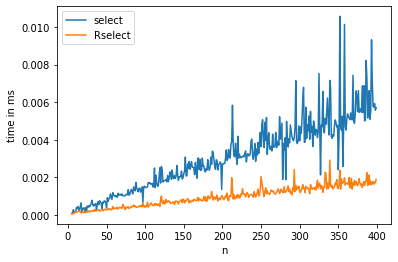

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat


x=[]; x2=[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import Select", stmt=f"Select({a},{0},{len(a)-1}, {n//2})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import Rselect", stmt=f"Rselect({a},{0},{len(a)-1}, {n//2})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["select", "Rselect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

# Analisis Comparacion con Rselect

Select posee mas operaciones que Rselect por lo tanto era de esperarse que fueras menos eficiente en tiempo que Rselect